In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("indeed_reviews_ca.csv", index_col="id")
df.sample(10)

,title,text,rating,reviewer,location,cons,pros,datetime,reviewer_employee_type,job_work_and_life_balance_rating,compensation_and_benefits_rating,job_security_and_advancement_rating,management_rating,job_culture_rating,state,company,year,month
id,,,,,,,,,,,,,,,,,,
1c437vochbrdfdbf,Flexible Hours,I liked this position because I could work as ...,4,Driver,"San Francisco Bay Area, CA","job advancement, compensation",Flexible hours,2018-01-17,Current Employee,5,4,4,4,5,ca,uber,2018,1
1eal16ghi31fj000,Fun Work majority of the time.,Employers do not care even in the slightest ab...,3,Driver/Operator,"San Francisco, CA",NaN,NaN,2020-06-12,Former Employee,2,2,1,1,2,ca,lyft,2020,6
1e5l727p639f7000,Flexible Hours,I love that I can login to work at my convenie...,5,Driver,"Los Angeles, CA",NaN,NaN,2020-04-11,Current Employee,5,1,1,1,1,ca,lyft,2020,4
1celkoc8ib812cj7,Think about it,Driving for Lyft is fun at times especially on...,2,Driver,"Fresno, CA",Low pay,Your own hours,2018-05-29,Current Employee,3,1,2,1,1,ca,lyft,2018,5
1cm3e1ltqb856aha,Uber Driver,Life as an Uber driver was actually pretty fun...,5,Driver,"San Francisco, CA",cars ages quickly,Pick your own hours,2018-08-29,Former Employee,5,0,0,0,5,ca,uber,2018,8
1fs0b8lkdmsaj801,Was good during covid but now not worth your t...,If the tips were better than this would be a g...,2,Delivery Driver,"Riverside, CA",Pay,Working whenever and wherever,2022-02-15,Former Employee,4,1,1,2,1,ca,doordash,2022,2
1dumbbs3lold8802,Gteat,After all the money I would have to put into t...,5,Driver,"Los Angeles, CA",NaN,NaN,2020-01-15,Current Employee,0,0,0,0,0,ca,uber,2020,1
1d4aud4grbrcq800,it was fun.,Got to meet new and diversified people and lea...,3,Driver/Delivery,"San Francisco, CA",NaN,easy on-boarding process and nice app.,2019-02-22,Former Employee,0,0,0,0,0,ca,lyft,2019,2
1fuqeu4o1msai802,Wear and tear on your car. High gas prices,"Pay is horrible, no more bonuses even with inf...",1,Delivery Driver,"Orange County, CA",NaN,NaN,2022-03-22,Current Employee,1,1,1,1,1,ca,uber,2022,3


<Axes: xlabel='year'>

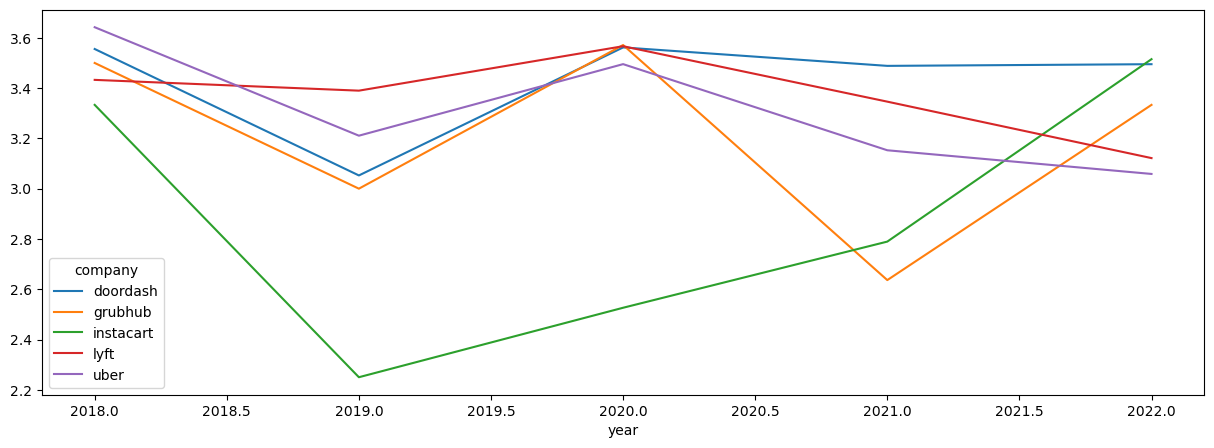

In [65]:
col = "rating"
df[df[col] != 0].groupby(["company", "year"])[col].mean().unstack().T.plot( figsize=(15, 5))

<Axes: xlabel='year,month'>

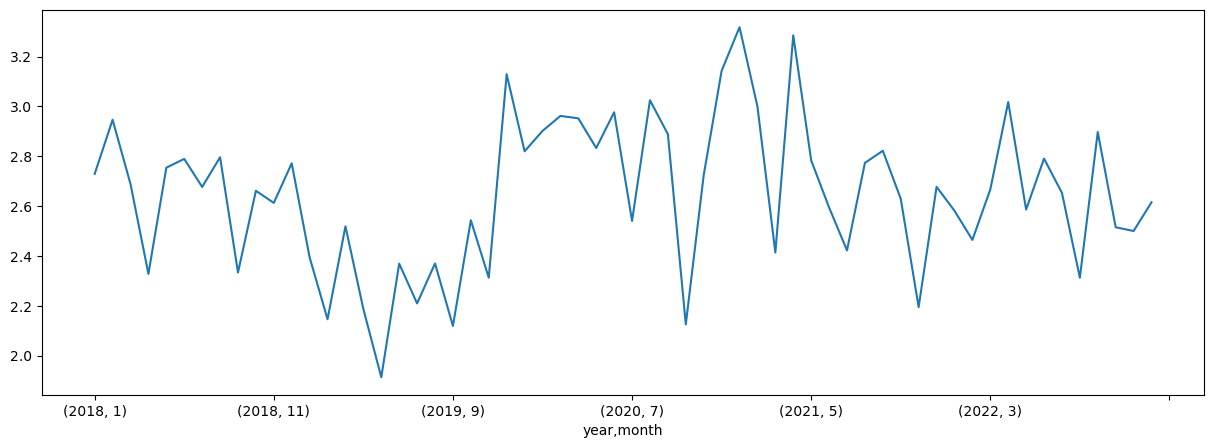

In [66]:
col = "compensation_and_benefits_rating"
df[df[col] != 0].groupby(["year", "month"])[col].mean().plot( figsize=(15, 5))

/tmp/ipykernel_11903/1912766848.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby([ 'year', 'month'])['job_security_and_advancement_rating', "job_work_and_life_balance_rating",


<Axes: xlabel='year,month'>

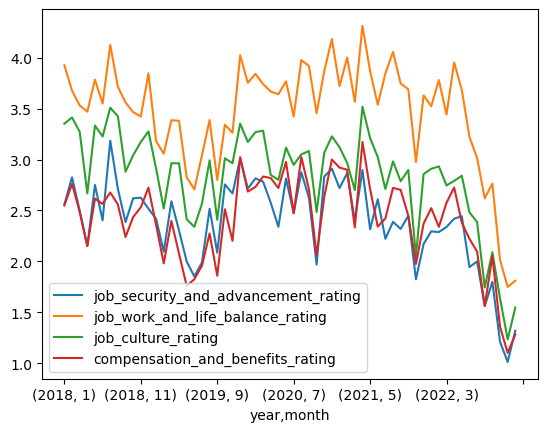

In [67]:
df.groupby([ 'year', 'month'])['job_security_and_advancement_rating', "job_work_and_life_balance_rating",
                               "job_culture_rating", "compensation_and_benefits_rating"].mean().plot()

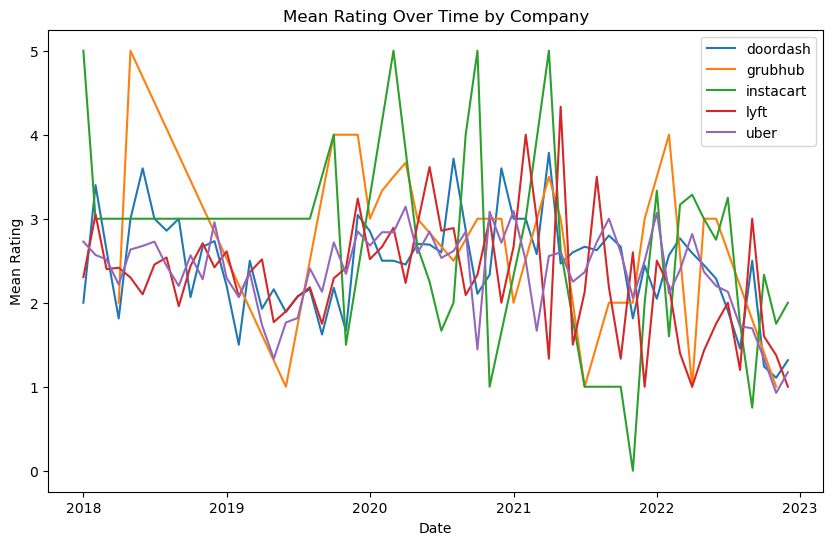

In [68]:
mean_rating = df.groupby(['company', 'year', 'month'])[col].mean().reset_index()

# generate a datetime for plotting
mean_rating['date'] = pd.to_datetime(mean_rating[['year', 'month']].assign(day=1))

# create a list of companies
companies = mean_rating['company'].unique()

# plot
plt.figure(figsize=(10,6))

for company in companies:
    company_data = mean_rating[mean_rating['company'] == company]
    plt.plot_date(company_data['date'], company_data[col], '-', label=company)

plt.title('Mean Rating Over Time by Company')
plt.xlabel('Date')
plt.ylabel('Mean Rating')
plt.legend()
plt.show()